<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-11/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer modelo

## Preparación del entorno de trabajo

Lo primero que vamos a hacer es preparar el entorno de trabajo. Para ello, descargaremos e importaremos las librerías necesarias:

Instalamos las librerías necesarias:

In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 204kB 7.5MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 


Las importamos:

In [ ]:
from fastai.vision.all import *
import os
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

Descargamos las imágenes:

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4" -O datos.zip && rm -rf /tmp/cookies.txt
!unzip datos.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/11932.jpg          
  inflating: data/11933.jpg          
  inflating: data/11934.jpg          
  inflating: data/11935.jpg          
  inflating: data/11936.jpg          
  inflating: data/11937.jpg          
  inflating: data/11938.jpg          
  inflating: data/11939.jpg          
  inflating: data/1194.jpg           
  inflating: data/11940.jpg          
  inflating: data/11941.jpg          
  inflating: data/11942.jpg          
  inflating: data/11943.jpg          
  inflating: data/11944.jpg          
  inflating: data/11945.jpg          
  inflating: data/11946.jpg          
  inflating: data/11947.jpg          
  inflating: data/11948.jpg          
  inflating: data/1195.jpg           
  inflating: data/11954.jpg          
  inflating: data/11958.jpg          
  inflating: data/1196.jpg           
  inflating: data/11962.jpg          
  inflating: data/11963.jpg          
  inflating: data/11964.jpg

Una vez tenemos las imágenes, debemos descargar las etiquetas. Cada etiqueta se relaciona con su imagen correspondiente por un ID (el nombre de la imagen). Estas etiquetas son necesarias para poder entrenar nuestro modelo.

In [ ]:
!wget https://www.dropbox.com/s/acezkcl7d1wfevz/LaRiojaEnLaMemoria.csv?dl=1 -O data.csv -q

Importamos los datos del CSV a un dataframe (usando pandas) para poder tratarlos.

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos años en Hormilleja,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN
2,82,LRM-2008/00016-Imagen,SrTraspaderne,Severiano Traspaderne con su furgoneta Citroen 2CV de reparto de piensos,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr Aragón y Sr García pertrechados para soportar el invierno en su motol (Rieju 125),NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN


Ahora, creamos una columna adicional que nos permita clasificar las imágenes según su decada:

In [ ]:
años = df['ANNO'].values
decadas = []
for año in años:
  decadas.append(str(año)[:3] + '0')
df['DECADA'] = decadas
df.head()

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR,DECADA
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos años en Hormilleja,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN,1960
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN,1960
2,82,LRM-2008/00016-Imagen,SrTraspaderne,Severiano Traspaderne con su furgoneta Citroen 2CV de reparto de piensos,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN,1960
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr Aragón y Sr García pertrechados para soportar el invierno en su motol (Rieju 125),NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN,1960
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN,1960


Finalmente, etiquetamos las imágenes a partir de la información de los metadatos.

Para ello, vamos a obtener las diferentes décadas en las que están tomadas las imágenes:

In [ ]:
decades = set(df['DECADA'])
print(decades)

{'1880', '1900', '1910', '1970', '1990', '1870', '1960', '1950', '1860', '1980', '1920', '1940', '1930', '1890'}


Creamos las carpetas contenedoras. El nombre de la carpeta es el año en que la foto está tomada.

In [ ]:
path = Path('data')
for decade in decades:
  (path/str(decade)).mkdir(parents=True,exist_ok=True)

Antes de nada, eliminamos las imágenes que no puedan ser tratadas por la librería:

In [ ]:
images = verify_images(get_image_files(path))
nDeleted = len(images)

for image in images:
  os.remove(str(image))

print(nDeleted)

0


Solo falta meter en cada carpeta las imágenes correspondientes. Para ello, definimos dos funciones:
- getIdFromPath: devuelve el id de la imagen según su path.
- getImageDecadeById(): devuelve la década de la imagen según su id.

In [ ]:
def getIdFromPath(path):
  pathAsString = str(path)
  pointIndex = pathAsString.index(".")
  barIndex = pathAsString.index("/")
  pathAsString = pathAsString[(barIndex+1):pointIndex]
  return pathAsString

In [ ]:
def getImageDecadeById(id):
  try:
    return df[df['ID_NUM'] == int(id)]['DECADA'].values[0]
  except:
    return -1

Para cada imagen, obtenemos su id, buscamos su década en la tabla y la movemos a la carpeta del año a la que pertenece.

Si la imagen no tiene un año asignado o no está incluida en los metadatos, se elimina, ya que no podemos utilizarla para entrenar el modelo.

In [ ]:
images = get_image_files(path)

for image in images:
  imageId = getIdFromPath(image)
  imageDecade = getImageDecadeById(imageId)
  
  if imageDecade != -1:
    shutil.move(str(image),path/(str(imageDecade)+'/'+image.name))
  else:
    print("No data for image " + str(imageId))
    os.remove(image)

No data for image 33980
No data for image 38159
No data for image 28836
No data for image 33779
No data for image 33712
No data for image 11840
No data for image 42563
No data for image 35401
No data for image 35515
No data for image 32142
No data for image 42574
No data for image 30355
No data for image 37570
No data for image 33716
No data for image 35616
No data for image 33714
No data for image 33715
No data for image 35651
No data for image 35615
No data for image 42562
No data for image 43264
No data for image 31839
No data for image 42564
No data for image 34506
No data for image 42582
No data for image 35313
No data for image 33700
No data for image 37832
No data for image 33705
No data for image 33702
No data for image 33710
No data for image 42575
No data for image 42439
No data for image 27907
No data for image 35416
No data for image 33708
No data for image 34090
No data for image 31048
No data for image 32069
No data for image 42558
No data for image 33711
No data for imag

Como se puede observar, hay algunas imágenes que no están recogidas en la tabla, por lo que no las podremos usar.

Al revisar los archivos, se puede observar que las décadas de 1860 y 1990 solo contienen una image. Esto no es suficiente, por lo que vamos a descartarlas.

In [ ]:
shutil.rmtree('data/1860')
shutil.rmtree('data/1990')

Finalmente, eliminamos los archivos que ya no vamos a utilizar:

In [ ]:
os.remove('data.csv')
os.remove('datos.zip')

## Separación en entrenamiento y test

Una vez que tenemos las imágenes separadas por décadas, podemos diferenciar el conjunto de entrenamiento y el de test. Lo hemos hecho en este orden para asegurar que hay suficientes imágenes en cada categoría.

In [ ]:
trainPath = Path('data/train')
testPath = Path('data/test')

fullDecades = decades.copy()
fullDecades.remove('1860')
fullDecades.remove('1990')

for decade in fullDecades:

  (trainPath/str(decade)).mkdir(parents=True,exist_ok=True)
  (testPath/str(decade)).mkdir(parents=True,exist_ok=True)

  trainDecade, testDecade = train_test_split(get_image_files(path/(str(decade))),test_size=0.2,random_state=15)

  for x in trainDecade:
    shutil.move(str(x),path/('train/' + str(decade) + '/'+x.name))

  for x in testDecade:
    shutil.move(str(x),path/('test/' + str(decade) + '/'+x.name))

  shutil.rmtree('data/' + str(decade))

## Definición del DataBlock y el DataLoader

A continuación definiremos estos dos objetos necesarios para poder entrenar el modelo.

### DataBlock

El DataBlock es el objeto que, gracias a una serie de opciones que se especifican en su constructor, permite cargar las imágenes en el modelo mediante un DataLoader.



In [ ]:
dataBlock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

### DataLoader

A partir del DataBlock, construimos el DataLoader. Es importante asignar un batch que sea una potencia de 2 para optimizar el uso de la GPU.

In [ ]:
dataLoader = dataBlock.dataloaders(trainPath,bs=128)

Ahora podemos visualizar un fragmento de nuestro dataset, así podemos comprobar que todo ha funcionado correctamente.

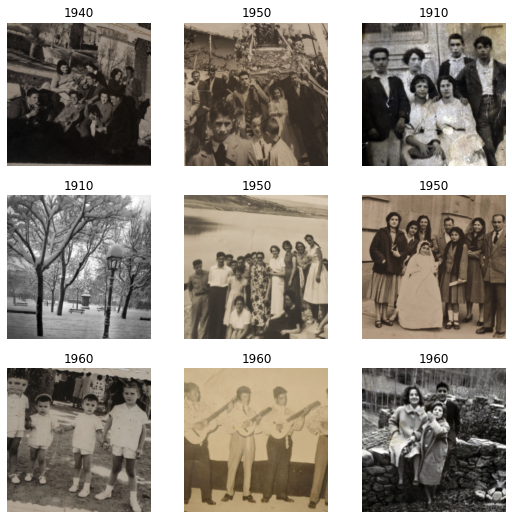

In [ ]:
dataLoader.show_batch()

## Creación del modelo

Tal y como se explicó en el entregable 2, vamos a construir una red convolucional utilizando *transfer learning* con arquitectura ResNet 34.

In [ ]:
learn = cnn_learner(dataLoader,resnet18,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


### Entrenamiento de la red

Antes de entrenar el modelo, buscamos el mejor learning rate:

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.005248074419796467)

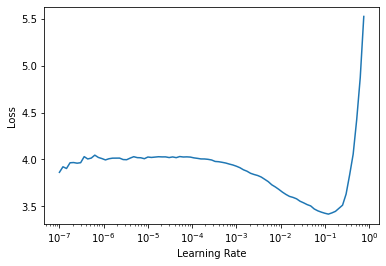

In [ ]:
learn.lr_find()

Siguiendo la metodología explicada [aquí](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html#how-do-you-find-a-good-learning-rate), 10^-2 es un buen valor del learning rate, en una posición anterior al punto de inflexión.

Utilizamos la funcionalidad de fine tune disponible en FastAI.

In [ ]:
learn.fine_tune(10,base_lr=10e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.324181,3.718700,0.281349,05:51


epoch,train_loss,valid_loss,accuracy,time
0,2.295481,18.496675,0.187566,05:50
1,2.005345,1.810670,0.345627,05:49
2,1.970736,nan,0.060063,05:51
3,1.923652,2.274153,0.277134,05:51
4,1.884020,1.587716,0.412013,05:50
5,1.797254,1.953000,0.308746,05:48
6,1.723020,1.691873,0.432034,05:50
7,1.645679,1.730690,0.360379,05:50
8,1.561047,1.525602,0.455216,05:49
9,1.480630,1.527446,0.433087,05:50


Lo exportamos para uso posterior:

In [ ]:
learn.export()

## Interpretación de los resultados

Creamos una interpretación para poder ver los resultados

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Podemos visualizar la matriz de confusión, para ver cuántas veces ha acertado nuestro modelo.

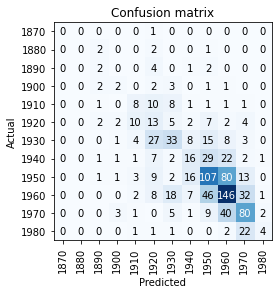

In [ ]:
interp.plot_confusion_matrix()

### Evaluación en el conjunto de test

Tenemos que crear nuevos objetos DataBlock Y DataLoader. El primero lo construiremos con un splitter concreto que nos permite especificar la base de datos de test

In [ ]:
dataBlockTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dataLoaderTest = dataBlockTest.dataloaders(path,bs=128)

Modificamos el anterior learner:

In [ ]:
learn.dls = dataLoaderTest

Evaluamos el modelo mediante el método validate().

In [ ]:
learn.validate()

(#2) [2.2304768562316895,0.1812080591917038]

El resultado no es demasiado bueno, el modelo solo tiene un 0.18 de accuracy.